All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 417:
> In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler


sns.set()
%matplotlib inline

# (a)

From the textbook, p. 417:
> Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.<br><br>*Hint: There are a number of functions in R that you can use to generate data. One example is the `rnorm()` function; `runif()` is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.*

In [2]:
np.random.seed(1)
x1 = 1.5*np.random.normal(size=(20, 50)) + 2*np.ones((1, 50))
x2 = np.random.uniform(size=(20, 50)) - 3*np.ones((1, 50))
x3 = np.random.normal(size=(20, 50)) + 10*np.ones([1, 50])
x = np.concatenate([x1, x2, x3])
y = np.array([1]*20 + [2]*20 + [3]*20)
x.shape

(60, 50)

# (b)

From the textbook, p. 417:
> Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

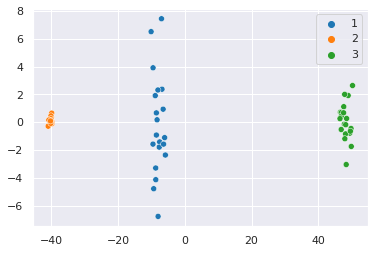

In [3]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y, palette='tab10')
plt.show()

Note that the scale is different for each axis. The points within one should have similar spread vertically and horizontally. 

# (c)

From the textbook, p. 417:
> Perform K-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in K-means clustering compare to the true class labels?<br><br>**Hint**: You can use the `table()` function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

To compare the clusterings, I am using [Rand index](https://en.wikipedia.org/wiki/Rand_index).

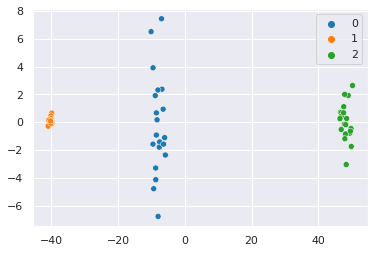

1.0

In [4]:
clust_c = KMeans(n_clusters=3, init='random', n_init=50)
clust_c.fit(x)
y_pred_c = clust_c.predict(x)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_pred_c, palette='tab10')
plt.show()
adjusted_rand_score(y, y_pred_c)

Rand index of $1.0$ means a perfect match.

# (d)

From the textbook, p. 417:
> Perform K-means clustering with $K = 2$. Describe your results.

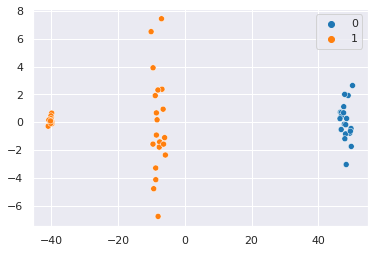

0.562962962962963

In [5]:
clust_d = KMeans(n_clusters=2, init='random', n_init=50)
clust_d.fit(x)
y_pred_d = clust_d.predict(x)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_pred_d, palette='tab10')
plt.show()
adjusted_rand_score(y, y_pred_d)

The two closest clusters have been merged.

# (e)

From the textbook, p. 417:
> Now perform K-means clustering with $K = 4$, and describe your results.

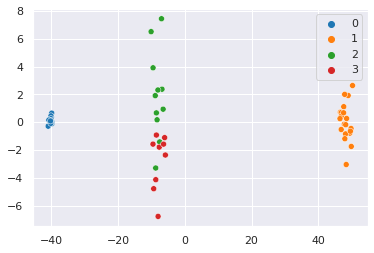

0.8657889294823189

In [6]:
clust_e = KMeans(n_clusters=4, init='random', n_init=50)
clust_e.fit(x)
y_pred_e = clust_e.predict(x)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_pred_e, palette='tab10')
plt.show()
adjusted_rand_score(y, y_pred_e)

The cluster with the widest spread has been split into two.

# (f)

From the textbook, p. 417:
> Now perform K-means clustering with $K = 3$ on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

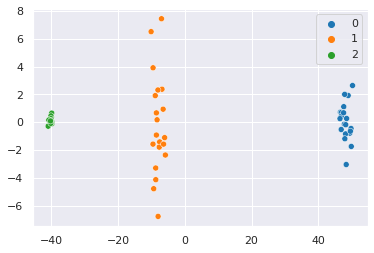

1.0

In [7]:
clust_f = KMeans(n_clusters=3, init='random', n_init=50)
clust_f.fit(x_pca)
y_pred_f = clust_f.predict(x_pca)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_pred_f, palette='tab10')
plt.show()
adjusted_rand_score(y, y_pred_f)

The perfect clustering again. The clusters are well-separated in projections; so the mistakes are unlikely.

# (g)

From the textbook, p. 417:
> Using the `scale()` function, perform K-means clustering with $K = 3$ on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

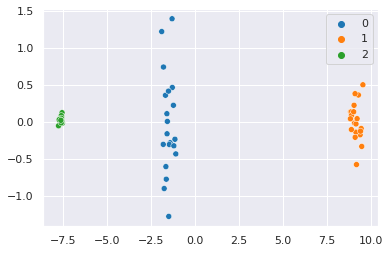

1.0

In [9]:
x = StandardScaler().fit_transform(x)
x_pca = pca.fit_transform(x)
clust_g = KMeans(n_clusters=3, init='random', n_init=50)
clust_g.fit(x)
y_pred_g = clust_g.predict(x)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_pred_g, palette='tab10')
plt.show()
adjusted_rand_score(y, y_pred_g)

Everything looks the same, but scaled down.